# Project: Wrangling and Analyze Data (WeRatedogs)

## Table of Contents :

### 1. [Description](#des)
### 2. [Objective](#ob)
### 3. [Data Gathering](#dg)
### 4. [Assessing Data](#ad)
#### 4.1[Visual Assessment](#va)
#### 4.2[Programmatic Assessment](#pa)
#### 4.3[Quality Issues](#qi)
#### 4.4[Tidy Issues](#ti)
### 5.  [Cleaning Data](#cd)
### 6.  [Storing Data](#sd)
### 7.  [Analyzing and Visualizing Data](#avd)
### 8.  [Insights from Data](#in)
### 9.  [References](#rf)







### Description <a class="anchor" id="des"></a>


WeRateDogs is a twitter account that rates people dogs with humorous comment about the dog by sharing the dog's image and brief comments about it. These ratings almost always have a denorminator of 10. The numerators though? Almost greater than 10. 11/10, 12/10,13/10 etc. Why? Because "they're good dogs Brent". WeRateDogs has over 4 million followers and has received international media coverage. They have shared  5000+ of their tweets containing some basic data such as there breeds and brief comments.

### Objective <a class='anchor' id='ob'></a>
The objective of this project is to gather these data from different sources, thoroughly assess them and cleaned them to raise the tidiness and quality of the data to create a correct analysis.

## Data Gathering <a class="anchor" id="dg"></a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

Let us start by importing important libraries we would use for this project

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import json
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy 
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
# importing WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
arch_df = pd.read_csv('twitter-archive-enhanced.csv')
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#downloading the image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as file:
    pre_file = requests.get(url)
    file.write(pre_file.content)
    

In [4]:
#loading image prediction file
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_df.head().T

,0,1,2,3,4
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
img_num,1,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311
p1_dog,True,True,True,True,True
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler
p2_conf,0.156665,0.0741917,0.138584,0.360687,0.243682
p2_dog,True,True,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tweets = []
with open('tweet_json.txt') as word:
    for items in word:
        tweets.append(json.loads(items))

In [7]:
#converting the tweets to dataframe tweet_df
tweet_df = pd.DataFrame(tweets)

In [8]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
tweet_df.shape

(2354, 31)

## Assessing Data <a class="anchor" id="ad"></a>


#### Visual Assesment <a class="anchor" id="va"></a>



In [10]:
#taking a look at random 10 samples of twitter archive data for visual assessment
arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334...,9,10,None,None,None,None,None
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344...,11,10,Sunshine,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None
1305,707387676719185920,NaN,NaN,2016-03-09 02:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarkus. He's a Skinny Eastern Worcesters...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707387676...,10,10,Clarkus,None,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [11]:
#taking a look at random 10 samples of image prediction data for visual assessment
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True


In [12]:
#assessing random 10 samples of tweet table
tweet_df.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
166,None,None,Wed May 03 19:26:06 +0000 2017,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 859851567826169857, 'id_str'...",16105,False,Meet Trooper. He picks pup recyclables that ha...,None,...,False,NaN,NaN,NaN,3780,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
611,None,None,Fri Nov 11 02:35:32 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Tyrone. He's a leaf wiz...,None,...,NaN,NaN,NaN,NaN,10411,False,{'created_at': 'Wed Jan 13 16:56:30 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1905,None,None,Wed Dec 09 04:36:06 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674447395825049600, 'id_str'...",1137,False,This pupper just wants a belly rub. This puppe...,None,...,False,NaN,NaN,NaN,393,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
432,None,None,Sun Jan 15 17:52:40 +0000 2017,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 820690162338279425, 'id_str'...",13518,False,The floofs have been released I repeat the flo...,None,...,False,NaN,NaN,NaN,3716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2227,None,None,Sun Nov 22 02:03:45 +0000 2015,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668248467379257344, 'id_str'...",1056,False,Say hello to Bisquick. He is a Brown Douglass ...,None,...,False,NaN,NaN,NaN,523,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
950,None,None,Sun Jul 10 00:32:46 +0000 2016,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 751937146756468736, 'id_str'...",5770,False,This is Ruby. Her ice cube is melting. She doe...,None,...,False,NaN,NaN,NaN,1530,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
128,None,None,Wed May 24 16:44:18 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 867420991437365250, 'id_str'...",16755,False,This is Shikha. She just watched you drop a sk...,None,...,False,NaN,NaN,NaN,2697,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1565,None,None,Fri Jan 15 02:41:12 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687826834726195200, 'id_str'...",2989,False,This is Louis. He's a rollercoaster of emotion...,None,...,False,NaN,NaN,NaN,1292,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
974,None,None,Mon Jul 04 18:00:41 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750023357219962880, 'id_str'...",2986,False,Meet Jax &amp; Jil. Jil is yelling the pledge ...,None,...,False,NaN,NaN,NaN,888,False,NaN,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
189,None,None,Sat Apr 22 18:55:51 +0000 2017,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,12498,False,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",None,...,False,{'created_at': 'Sat Apr 22 18:54:20 +0000 2017...,8.558573e+17,855857318168150016,2313,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196

In [13]:
#transposing tweet table for proper visibility of all columns
tweet_df.T

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353
contributors,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
coordinates,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
created_at,Tue Aug 01 16:23:56 +0000 2017,Tue Aug 01 00:17:27 +0000 2017,Mon Jul 31 00:18:03 +0000 2017,Sun Jul 30 15:58:51 +0000 2017,Sat Jul 29 16:00:24 +0000 2017,Sat Jul 29 00:08:17 +0000 2017,Fri Jul 28 16:27:12 +0000 2017,Fri Jul 28 00:22:40 +0000 2017,Thu Jul 27 16:25:51 +0000 2017,Wed Jul 26 15:59:51 +0000 2017,...,Mon Nov 16 01:01:59 +0000 2015,Mon Nov 16 00:55:59 +0000 2015,Mon Nov 16 00:49:46 +0000 2015,Mon Nov 16 00:35:11 +0000 2015,Mon Nov 16 00:30:50 +0000 2015,Mon Nov 16 00:24:50 +0000 2015,Mon Nov 16 00:04:52 +0000 2015,Sun Nov 15 23:21:54 +0000 2015,Sun Nov 15 23:05:30 +0000 2015,Sun Nov 15 22:32:08 +0000 2015
display_text_range,"[0, 85]","[0, 138]","[0, 121]","[0, 79]","[0, 138]","[0, 138]","[0, 140]","[0, 118]","[0, 122]","[0, 133]",...,"[0, 135]","[0, 124]","[0, 140]","[0, 138]","[0, 140]","[0, 120]","[0, 137]","[0, 130]","[0, 139]","[0, 131]"
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'hashtags': [], 'symbols': [], 'user_mentions...",...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,"{'media': [{'id': 892420639486877696, 'id_str'...","{'media': [{'id': 892177413194625024, 'id_str'...","{'media': [{'id': 891815175371796480, 'id_str'...","{'media': [{'id': 891689552724799489, 'id_str'...","{'media': [{'id': 891327551943041024, 'id_str'...","{'media': [{'id': 891087942176911360, 'id_str'...","{'media': [{'id': 890971906207338496, 'id_str'...","{'media': [{'id': 890729118844600320, 'id_str'...","{'media': [{'id': 890609177319665665, 'id_str'...","{'media': [{'id': 890240245463175168, 'id_str'...",...,"{'media': [{'id': 666058597072306176, 'id_str'...","{'media': [{'id': 666057085227016192, 'id_str'...","{'media': [{'id': 666055517517848576, 'id_str'...","{'media': [{'id': 666051848592334848, 'id_str'...","{'media': [{'id': 666050754986266625, 'id_str'...","{'media': [{'id': 666049244999131136, 'id_str'...","{'media': [{'id': 666044217047650304, 'id_str'...","{'media': [{'id': 666033409081393153, 'id_str'...","{'media': [{'id': 666029276303482880, 'id_str'...","{'media': [{'id': 666020881337073664, 'id_str'..."
favorite_count,39467,33819,25461,42908,41048,20562,12041,56848,28226,32467,...,115,304,448,1253,136,111,311,128,132,2535
favorited,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
full_text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be

In [14]:
tweet_df.sample(10).T

,169,2263,1223,709,2210,488,25,204,1527,976
contributors,None,None,None,None,None,None,None,None,None,None
coordinates,None,None,None,None,None,None,None,None,None,None
created_at,Mon May 01 15:58:40 +0000 2017,Fri Nov 20 02:47:56 +0000 2015,Sun Mar 27 17:25:54 +0000 2016,Sat Oct 08 18:41:19 +0000 2016,Mon Nov 23 00:30:28 +0000 2015,Wed Dec 28 00:52:25 +0000 2016,Mon Jul 17 16:17:36 +0000 2017,Fri Apr 14 15:51:39 +0000 2017,Thu Jan 21 19:04:15 +0000 2016,Mon Jul 04 16:00:22 +0000 2016
display_text_range,"[0, 139]","[0, 140]","[0, 137]","[0, 73]","[0, 134]","[0, 93]","[0, 101]","[0, 139]","[0, 137]","[0, 77]"
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,"{'media': [{'id': 859074595021836288, 'id_str'...","{'media': [{'id': 667534814648496128, 'id_str'...","{'media': [{'id': 714141403652231168, 'id_str'...","{'media': [{'id': 784826004988653570, 'id_str'...",NaN,"{'media': [{'id': 813910431769251840, 'id_str'...","{'media': [{'id': 886983218871902208, 'id_str'...","{'media': [{'id': 852912235101921280, 'id_str'...","{'media': [{'id': 690248557182488576, 'id_str'...","{'media': [{'id': 749823820396163072, 'id_str'..."
favorite_count,35553,866,4673,11310,1760,10342,35859,9658,1845,3331
favorited,False,False,False,False,False,False,False,False,False,False
full_text,Here we have an exotic dog. Good at ukulele. F...,"This is Frank (pronounced ""Fronq""). Too many b...","I know we only rate dogs, but since it's Easte...",This is Rusty. He's going D1 for sure. Insane ...,Never forget this vine. You will not stop watc...,This is Chubbs. He dug a hole and now he's stu...,This is Maya. She's very shy. Rarely leaves he...,Meet Benny. He likes being adorable and making...,This is Maxwell. That's his moped. He rents it...,This is Bo. He emanates happiness. 12/10 I cou...
geo,None,None,None,None,None,None,None,None,None,None


#### Programmatic Assesment <a class="anchor" id="pa"></a>


In [15]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
arch_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Stanley        6
Jax            6
Bella          6
Jack           6
Milo           6
Koda           6
Leo            6
Rusty          6
Scout          6
Dave           6
Oscar          6
Phil           5
            ... 
Eugene         1
Bobby          1
Shiloh         1
Gilbert        1
Cupid          1
Major          1
Mabel          1
Divine         1
Combo          1
Sojourner      1
River          1
Devón          1
Kona           1
Maya           1
Siba           1
Cuddles        1
Murphy         1
Donny          1
Sundance       1
Dutch          1
Jay            1
Blu            1
Rueben         1
Caryl          1
Kevon          1
Superpup       1
Spencer        1
Hazel         

In [17]:
arch_df[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].isnull().sum()

retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
dtype: int64

In [18]:
arch_df[['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id']].notnull().sum()

retweeted_status_timestamp    181
retweeted_status_id           181
retweeted_status_user_id      181
dtype: int64

In [19]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
arch_df.name.duplicated().sum()

1399

In [21]:
arch_df[arch_df['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [22]:
arch_df.text.nunique()

2356

In [23]:
arch_df.text.duplicated().sum()

0

In [24]:
arch_df[['text','doggo','floofer','pupper','puppo']].sample(10)

,text,doggo,floofer,pupper,puppo
1856,Meet Sammy. He's a Motorola Firefox. Hat under...,None,None,None,None
1844,This dog is being demoted to a 9/10 for not we...,None,None,None,None
827,This is DonDon. He's way up but doesn't feel b...,None,None,None,None
1371,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",None,None,None,None
50,This is Stanley. He has his first swim lesson ...,None,None,None,None
863,Meet Glenn. Being in public scares him. Fright...,None,None,None,None
545,This is Duke. He is not a fan of the pupporazz...,None,None,None,None
149,Ladies and gentlemen... I found Pipsy. He may ...,None,None,None,None
330,This is Gidget. She's a spy pupper. Stealthy a...,None,None,pupper,None
911,RT @jon_hill987: @dog_rates There is a cunning...,None,None,pupper,None


In [25]:
arch_df[['text','doggo','floofer','pupper','puppo']].duplicated().sum()

0

In [26]:
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
arch_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
arch_df.source.nunique()

4

In [29]:
arch_df[arch_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
arch_df[~arch_df.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [31]:
print(arch_df.doggo.value_counts())
print(arch_df.floofer.value_counts())
print(arch_df.pupper.value_counts())
print(arch_df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [32]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
1269,749774190421639168,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True


In [33]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [35]:
image_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
malinois                           20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [36]:
image_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [37]:
image_df[image_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
tweet_df.sample(7)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1171,None,None,Wed Apr 13 19:59:42 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 720340697887457281, 'id_str'...",3131,False,This is Derek. He just got balled on. Can't ev...,None,...,False,NaN,NaN,NaN,1098,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1931,None,None,Tue Dec 08 00:15:09 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674019340715446272, 'id_str'...",1208,False,This is Acro. You briefly see her out of the c...,None,...,False,NaN,NaN,NaN,340,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2181,None,None,Tue Nov 24 03:08:48 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668989611830435842, 'id_str'...",726,False,This is Bernie. He's taking his Halloween cost...,None,...,False,NaN,NaN,NaN,356,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1018,None,None,Sat Jun 25 17:31:25 +0000 2016,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,10520,False,This is Maddie. She gets some wicked air time....,None,...,False,NaN,NaN,NaN,4432,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1090,None,None,Mon May 30 16:40:14 +0000 2016,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 737322732686323712, 'id_str'...",3953,False,Say hello to Lily. She's not injured or anythi...,None,...,False,NaN,NaN,NaN,907,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2270,None,None,Thu Nov 19 23:53:52 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667491008582541313, 'id_str'...",559,False,Two dogs in this one. Both are rare Jujitsu Py...,None,...,False,NaN,NaN,NaN,242,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1829,None,None,Mon Dec 14 01:43:35 +0000 2015,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676215924094029825, 'id_str'...",1881,False,This is Herm. He just wants to be like the oth...,None,...,False,NaN,NaN,NaN,661,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [39]:
#transposing the dataset to view all columns
tweet_df.sample(10).T

,1115,439,559,231,687,2229,2156,1341,671,85
contributors,None,None,None,None,None,None,None,None,None,None
coordinates,None,None,None,None,None,None,None,None,None,None
created_at,Tue May 17 01:00:32 +0000 2016,Fri Jan 13 15:08:56 +0000 2017,Sun Nov 27 19:09:28 +0000 2016,Sat Apr 01 00:04:17 +0000 2017,Mon Oct 17 00:20:47 +0000 2016,Sun Nov 22 00:34:50 +0000 2015,Wed Nov 25 17:49:14 +0000 2015,Tue Mar 01 20:11:59 +0000 2016,Sat Oct 22 18:57:48 +0000 2016,Fri Jun 16 16:11:53 +0000 2017
display_text_range,"[0, 113]","[0, 97]","[0, 74]","[0, 140]","[0, 98]","[0, 84]","[0, 122]","[0, 139]","[0, 109]","[0, 125]"
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,"{'media': [{'id': 732375209307705344, 'id_str'...","{'media': [{'id': 819924138965999617, 'id_str'...","{'media': [{'id': 802952490266357760, 'id_str'...","{'media': [{'id': 847962765348052992, 'id_str'...","{'media': [{'id': 787810541230227456, 'id_str'...","{'media': [{'id': 668226088657682437, 'id_str'...","{'media': [{'id': 669573559438712832, 'id_str'...","{'media': [{'id': 704761116849774592, 'id_str'...",NaN,"{'media': [{'id': 875747755280318464, 'id_str'..."
favorite_count,8832,14305,10085,25296,9717,323,467,7283,11673,25773
favorited,False,False,False,False,False,False,False,False,False,False
full_text,This is Kyle (pronounced 'Mitch'). He strives ...,Here we have a doggo who has messed up. He was...,This is Marley. She's having a ruff day. Prett...,This is Georgie. He's very shy. Only puppears ...,This is Frank. He wears sunglasses and walks h...,Sneaky dog here. Tuba player has no clue. 10/1...,This is Linda. She just looked up and saw you ...,This pupper killed this great white in an epic...,This is Ralphy. His dreams were just shattered...,This is Goose. He's a womanizer. Cheeky as h*c...
geo,None,None,None,None,None,None,None,None,None,None


In [40]:
#collected 10 samples of id values and id_str values to check if the are the same
id_list = [819238181065359361,673636718965334016,822647212903690241,676575501977128964,670452855871037440,883838122936631299,671497587707535361,733828123016450049,715342466308784130,734776360183431168]
id_str_list = [819238181065359361,673636718965334016,822647212903690241,676575501977128964,670452855871037440,883838122936631299,671497587707535361,733828123016450049,715342466308784130,734776360183431168]

check = id_list == id_str_list

In [41]:
#Results True means the values in id and id_str is the same
check

True

In [42]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [43]:
print(tweet_df.contributors.value_counts())
print(tweet_df.coordinates.value_counts())

Series([], Name: contributors, dtype: int64)
Series([], Name: coordinates, dtype: int64)


In [44]:
print(tweet_df.quoted_status_id_str.value_counts())
print(tweet_df.quoted_status_id.value_counts())

823966201328046080    1
834086676934836224    1
855656431005061120    1
841311395547250688    1
771905568600719360    1
716637124322177024    1
866458718883467265    1
886053434075471873    1
874413398133547008    1
706165920809492480    1
796123679771897856    1
883965650754039809    1
832268302944579584    1
806570933175652352    1
846088479142531073    1
709919141004595201    1
871075758080503809    1
846484798663245829    1
838948714227998720    1
885517367337512960    1
878599868507402241    1
672108316018024452    1
855857318168150016    1
759167558763196416    1
788818328538099712    1
804417859124273152    1
876162994446753793    1
725136065078521856    1
817902080979599361    1
Name: quoted_status_id_str, dtype: int64
8.340867e+17    1
8.413114e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.179021e+17    1
8.855174e+1

In [45]:
tweet_df.lang.value_counts()

en     2336
und       7
nl        3
in        3
eu        1
tl        1
et        1
ro        1
es        1
Name: lang, dtype: int64

### Quality issues <a class="anchor" id="qi"></a>


#### Archive table
    
   1. Contains Irrelevant columns (**in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_url**).
   2. Wrong datatype for **timestamp** and **retweeted_status_timestamp**. The datatypes are objects instead of datetime.
   3. Wrong datatype for **tweet_id**. (str)
   3. Over 745 names in **name** column is None.
   4. **doggo,floofer,pupper and puppo** columns contains None values.
   5. **retweeted_status,retweeted_status_user_id, and retweeted_status_timestamp** has 2175 null values.
   6. All names in **name** column are not capitalized.
   7. **source** column too lengthy 
   8. **name** column has over 654 duplicates.
                  
#### Image Table
    
   1. **p1,p2,p3** contains uppercase and lowercase letters .
   2. Wrong datatype for **tweet_id**. (str)
   2. **jpg_Url** column name makes no sense.
 
#### Tweet table.
        
   1. the **source** column is not readable and too lengthy.
   
   3. **Id_str** is the same with **Id** contents are the same and have to be changed to tweet_id.
   4. **Id_str** has worng datatype.
   5. **created_at** column has a wrong datatype. (datetime)
   6. **place,geo,contributors,coordinates and retweeted_status** etc.. columns contains zero (0) and few records.

### Tidiness issues <a class="anchor" id="ti"></a>


#### Archive Table
1. **doggo,floofer,pupper and puppo** columns are developmental stages of dog information.

#### All Table
2. All tables should be merged as one table. 

## Cleaning Data <a class="anchor" id="cd"></a>

In this section, clean **all** of the issues you documented while assessing. 

Before proceeding to cleanong these tables, I need to make a copy of the three dataset inorder to keeep the original infromation.

In [46]:
# Make copies of original pieces of data
arch_copy = arch_df.copy()
image_copy = image_df.copy()
tweet_copy = tweet_df.copy()

### Issue #1: Irrelevant columns contained in archive and tweet tables

#### Define: 
1. Before droppping these columns we need to remove all rows with retweets in **retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp** columns.
2. Irrelevant columns contained in archive and tweet tables will be dropped using .drop() function

#### Code

In [47]:
arch_copy = arch_copy[arch_copy.retweeted_status_id.isnull()]
arch_copy = arch_copy[arch_copy.retweeted_status_user_id.isnull()]
arch_copy = arch_copy[arch_copy.retweeted_status_timestamp.isnull()]

In [48]:
#dropping irrelevant columns in archive table
#in_reply_to_status_id
#in_reply_to_user_id
#retweeted_status_id
#retweeted_status_user_id
#retweeted_status_timestamp 
#expanded_urls

arch_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

In [49]:
#Irrelevant columns in tweet table
#possibly_sensitive          
#possibly_sensitive_appealable
#quoted_status        
#quoted_status_id
#quoted_status_id_str
#in_reply_to_screen_name          
#in_reply_to_status_id  
#in_reply_to_status_id_str  
#in_reply_to_user_id              
#in_reply_to_user_id_str
#place
#geo
#contributors
#coordinates
#retweeted_status

tweet_copy.drop(['in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','place','geo','contributors','coordinates','retweeted_status'], axis=1, inplace = True)

#### Test

In [50]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [51]:
arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [52]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
created_at            2354 non-null object
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
id_str                2354 non-null object
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), int64(3), object(9)
memory usage: 230.0+ KB


In [53]:
tweet_copy.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'id', 'id_str',
       'is_quote_status', 'lang', 'retweet_count', 'retweeted', 'source',
       'truncated', 'user'],
      dtype='object')

### Issue #2: Capitalize words in name column in archive table, p1,p2,p3 column in image table

#### Define  Capitalize the first letters in name column, p1,p2 and p3 column using capitalize() function

#### Code

In [54]:
#capitalizing names in name column
arch_copy.name = [names.capitalize() for names in arch_copy.name]

In [55]:
# capitalizing names in p1,p2 and p3 column
image_copy.p1 = image_copy.p1.str.capitalize()
image_copy.p2 = image_copy.p2.str.capitalize()
image_copy.p3 = image_copy.p3.str.capitalize()

#### Test

In [56]:
#check if names has been capitalized
arch_copy.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          Such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326       Quite
2327           A
2328        None
2329        None
2330        None
2331        None
2332        None
2333          An
2334           A
2335          An
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         The
2346         The
2347           A
2348           A
2349          An
2350           A
2351        None
2352           A
2353          

In [57]:
#check if the are all capitalized
image_copy[['p1','p2','p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_swiss_mountain_dog
6,Box_turtle,Mud_turtle,Terrapin
7,Chow,Tibetan_mastiff,Fur_coat
8,Shopping_cart,Shopping_basket,Golden_retriever
9,Miniature_poodle,Komondor,Soft-coated_wheaten_terrier


In [58]:
image_copy.p1.value_counts()

Golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy_poodle                    39
Pomeranian                    38
Malamute                      30
Cocker_spaniel                30
French_bulldog                26
Chesapeake_bay_retriever      23
Miniature_pinscher            23
Seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Web_site                      19
Cardigan                      19
Beagle                        18
Teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Shih-tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Kuvasz                        16
Italian_greyhound             16
          

### Issue #3: Handling Wrong datatypes

#### Define:
1. Change **timestamp** datatype to datetime using `pd.to_datetime()` function.

2. Change **tweet_id** in archive table datatype to string using `.astype(str)` function.

3. Change **tweet_id** in image table datatype to string using `.astype(str)` function.

4. Change **created_at** datatype to datetime using `pd.to_datetime()` function.

#### Code

In [59]:
# changing timestamp and created datatype to datetime
arch_copy.timestamp = pd.to_datetime(arch_copy.timestamp)
tweet_copy.created_at = pd.to_datetime(tweet_copy.created_at)

In [60]:
# changing tweet_ids to string
arch_copy.tweet_id = arch_copy.tweet_id.astype('str')
image_copy.tweet_id = image_copy.tweet_id.astype('str')

#### Test

In [61]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [63]:
print('timestamp has been changed to datetime datatype \n tweet_id to string')

timestamp has been changed to datetime datatype 
 tweet_id to string


In [64]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [65]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
created_at            2354 non-null datetime64[ns]
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
id_str                2354 non-null object
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), datetime64[ns](1), int64(3), object(8)
memory usage: 230.0+ KB


In [66]:
print("Created_at has been changed to datetime datatype")

Created_at has been changed to datetime datatype


### Issue #4: Rename jp_url

#### Define: Rename jpg_url to image_url to be more understandable using the `.rename()` function

#### Code

In [67]:
image_copy.rename(columns={'jpg_url':'image_url'},inplace=True)

#### Test

In [68]:
image_copy.head(3)

,tweet_id,image_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### Issue #5: Rename id_str to tweet_id because of its unique values

   #### Define: Rename id_str to twee_id using `.rename()` function to enable us merge these datasets together.

#### Code

In [69]:
tweet_copy.rename(columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [70]:
tweet_copy.head(3)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,tweet_id,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,False,en,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Since our column has been renamed to tweet_id lets proceed to make it the first column in our `tweet_copy` dataset like the rest

### Issue #6: Change the position of tweet_id in tweet_copy table 

#### Define: 
   1. We need to remove the column from our dataset using `.pop()` function and save it in a variable called f_column.
   
   2. Insert the the column at the first position using `insert()` function.
   
   3. Preview our dataset and check if it worked.

#### Code

In [71]:
# shifting tweet_id from to first position
f_column = tweet_copy.pop('tweet_id')

#inserting tweet_id column to first position
tweet_copy.insert(0, 'tweet_id', f_column)

#### Test

In [72]:
tweet_copy.head(3)

,tweet_id,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,892420643555336193,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,False,en,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,4328,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


That was a success!!

### Issue #7: None value

#### Define:
We need to change all None values in `name`, `doggo`,`floofer`,`pupper` qnd `puppo` columns to NaN. Because, np.nan allows for vectorized operations; its a float value, while None, by definition, forces object type, which basically disables all efficiency in numpy.

#### Code

In [73]:
#define a function
def change_none(value):
    if value == 'None':
        value = np.NaN
    return value

#applying function to name,doggo,floffer,pupper and puppo columns 
arch_copy.name = [change_none(value) for value in arch_copy.name]
arch_copy.doggo = [change_none(value) for value in arch_copy.doggo]
arch_copy.floofer = [change_none(value) for value in arch_copy.floofer]
arch_copy.pupper = [change_none(value) for value in arch_copy.pupper]
arch_copy.puppo = [change_none(value) for value in arch_copy.puppo]

#### Test

In [74]:
arch_copy[['name','doggo','floofer','pupper','puppo']].head(10)

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,Jax,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Zoey,NaN,NaN,NaN,NaN
9,Cassie,doggo,NaN,NaN,NaN


In [75]:
arch_copy[arch_copy.name == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [76]:
arch_copy[arch_copy.doggo == 'None']
arch_copy[arch_copy.pupper == 'None']
arch_copy[arch_copy.floofer == 'None']
arch_copy[arch_copy.puppo == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: Source column values in tweet and archive table is  lengthy

#### Define 
We need to get the unique source values in these tables and replace them to something shorter and understandable using `.replace()` function

#### Code

In [77]:
#calling out the unique values in source column in archive table
arch_copy.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [78]:
#replacing all unique source values with a more readable word
arch_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace = True)
arch_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace = True)
arch_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine_Make a Scene',inplace = True)
arch_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace = True)

In [79]:
#calling out the unique valiues in source column in tweet table
tweet_copy.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [80]:
#replacing all unique source values with a more readable word
tweet_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace = True)
tweet_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace = True)
tweet_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine_Make a Scene',inplace = True)
tweet_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace = True)

#### Test

In [81]:
# checking archive table
arch_copy.source.value_counts()

Twitter for iPhone    2042
Vine_Make a Scene       91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [82]:
arch_copy.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1678,682047327939461121,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seem...,10,10,NaN,NaN,NaN,NaN,NaN
1589,686683045143953408,2016-01-11 22:56:10,Twitter for iPhone,This is Mona. She's a Yarborough Splishnsplash...,11,10,Mona,NaN,NaN,pupper,NaN
2324,666421158376562688,2015-11-17 01:02:40,Twitter for iPhone,*internally screaming* 12/10 https://t.co/YMcr...,12,10,NaN,NaN,NaN,NaN,NaN
1953,673662677122719744,2015-12-07 00:37:52,Twitter for iPhone,This is Kendall. 12/10 would cuddle the hell o...,12,10,Kendall,NaN,NaN,NaN,NaN
65,879492040517615616,2017-06-27 00:10:17,Twitter for iPhone,This is Bailey. He thinks you should measure e...,12,10,Bailey,NaN,NaN,NaN,NaN
1364,702899151802126337,2016-02-25 16:53:11,Vine_Make a Scene,Say hello to Luna. Her tongue is malfunctionin...,12,10,Luna,NaN,NaN,NaN,NaN
258,843604394117681152,2017-03-19 23:25:35,Twitter for iPhone,This is Hank. He's been outside for 3 minutes ...,11,10,Hank,NaN,NaN,NaN,NaN
1820,676588346097852417,2015-12-15 02:23:26,Twitter for iPhone,This is Bubbles. He kinda resembles a fish. Al...,5,10,Bubbles,NaN,NaN,NaN,NaN
2165,669367896104181761,2015-11-25 04:11:57,Twitter for iPhone,This is Chip. Chip's pretending to be choked. ...,10,10,Chip,NaN,NaN,NaN,NaN
1054,742423170473463808,2016-06-13 18:27:32,Twitter for iPhone,This is Bell. She likes holding hands. 12/10 w...,12,10,Bell,NaN,NaN,NaN,NaN


In [83]:
#checking if the unique source values has been changed to a more readable word in tweet table  
tweet_copy.source.value_counts()

Twitter for iPhone    2219
Vine_Make a Scene       91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [84]:
tweet_copy.sample(10)

,tweet_id,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
711,784431430411685888,2016-10-07 16:33:21,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 784431410685902849, 'id_str'...",6329,False,This is Stormy. He's curly af. Already pupared...,784431430411685888,False,en,1491,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2343,666063827256086533,2015-11-16 01:22:45,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666063820255862784, 'id_str'...",496,False,This is the happiest dog you will ever see. Ve...,666063827256086533,False,en,232,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2176,669015743032369152,2015-11-24 04:52:37,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669015737663684612, 'id_str'...",785,False,Super rare dog right here guys. Doesn't bark. ...,669015743032369152,False,en,403,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1816,676593408224403456,2015-12-15 02:43:33,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4954,False,This pupper loves leaves. 11/10 for committed ...,676593408224403456,False,en,2410,False,Vine_Make a Scene,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1490,692828166163931137,2016-01-28 21:54:41,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692828155242004480, 'id_str'...",3148,False,This pupper just descended from heaven. 12/10 ...,692828166163931137,False,en,998,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2295,667073648344346624,2015-11-18 20:15:26,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667073641872494593, 'id_str'...",425,False,Here is Dave. He is actually just a skinny leg...,667073648344346624,False,en,134,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1966,673320132811366400,2015-12-06 01:56:44,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673320125483892736, 'id_str'...",14441,False,This is Frankie. He's wearing blush. 11/10 rea...,673320132811366400,False,en,8705,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1549,689143371370250240,2016-01-18 17:52:38,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689143357063475200, 'id_str'...",2232,False,Meet Trip. He likes wearing costumes that aren...,689143371370250240,False,en,579,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
940,752917284578922496,2016-07-12 17:27:23,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 752917276685438976, 'id_str'...",7592,False,This is Grizzie. She's a semi-submerged Bahrai...,752917284578922496,False,en,1790,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1807,676864501615042560,2015-12-15 20:40:47,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676864493910028289, 'id_str'...",2294,False,Meet Ash. He's just a head now. Lost his body ...,676864501615042560,False,en,808,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


That was a success!!!

Now let's take care of untidiness

### Tidiness

### Issue #1: `doggo`, `pupper`, `floofer` and `puppo` are different developmental stages of dogs

#### Define: 
1. We need to create a new column that will contain the four different dog stages with name `dog_stages`.
2. We would drop **doggo, pupper, floofer and puppo** column from archive table.
3. Check if our code worked perfectly.


#### Code

In [85]:
arch_copy.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN


In [86]:
#creating a new column
arch_copy['dog_stages'] = None

#function to fill all doggo,floofer,pupper and puppo to dog_stages
def fil_dog_stages(data,d_col,d_value):
    data['dog_stages'] = np.where(d_col == d_value,d_col,arch_copy['dog_stages'])
    
#fill values if doggo is not NaN
fil_dog_stages(arch_copy,arch_copy['doggo'],'doggo')

#fill values if floofer is not NaN
fil_dog_stages(arch_copy,arch_copy['floofer'],'floofer')

#fill values if puppo is not NaN
fil_dog_stages(arch_copy,arch_copy['puppo'],'puppo')

#fill values if pupper is not NaN
fil_dog_stages(arch_copy,arch_copy['pupper'],'pupper')

In [87]:
#dropping doggo,floofer,pupper and puppo  columns
arch_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [88]:
arch_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [89]:
arch_copy.dog_stages.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stages, dtype: int64

That's a success!!!!

### Issue #2: Merge the three tables to one table

#### Define: 
We would merge these three tables to one using the `pd.merge()` function on its unique identifers **tweet_id** 

#### Code

In [90]:
#merging the tables together
merge_df = pd.merge(pd.merge(arch_copy,tweet_copy, on=['tweet_id','source'], how='inner'),image_copy, on='tweet_id')

In [91]:
merge_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,created_at,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08-01 16:23:56,"[0, 85]",...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017-08-01 00:17:27,"[0, 138]",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017-07-31 00:18:03,"[0, 121]",...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017-07-30 15:58:51,"[0, 79]",...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017-07-29 16:00:24,"[0, 138]",...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [92]:
merge_df.sample(10).T

,1104,1960,1300,1401,1907,379,720,396,1552,323
tweet_id,699370870310113280,666430724426358785,684460069371654144,679503373272485890,667517642048163840,812466873996607488,750071704093859840,808501579447930884,674638615994089473,820690176645140481
timestamp,2016-02-15 23:13:03,2015-11-17 01:40:41,2016-01-05 19:42:51,2015-12-23 03:26:43,2015-11-20 01:39:42,2016-12-24 01:16:12,2016-07-04 21:00:04,2016-12-13 02:39:32,2015-12-09 17:15:54,2017-01-15 17:52:40
source,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter Web Client,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone
text,Say hello to Calbert. He doesn't have enough l...,Oh boy what a pup! Sunglasses take this one to...,This is Jeph. He's a Western Sagittarius Dookm...,This is Dwight. He's a pointy pupper. Very doc...,This is Dook &amp; Milo. Dook is struggling to...,This is Mary. She's desperately trying to recr...,Pause your cookout and admire this pupper's ni...,This is Koda. He dug a hole and then sat in it...,This pupper is fed up with being tickled. 12/1...,The floofs have been released I repeat the flo...
rating_numerator,11,6,10,8,8,12,10,12,12,84
rating_denominator,10,10,10,10,10,10,10,10,10,70
name,Calbert,NaN,Jeph,Dwight,Dook,Mary,NaN,Koda,NaN,NaN
dog_stages,None,None,None,pupper,None,None,pupper,None,pupper,None
created_at,2016-02-15 23:13:03,2015-11-17 01:40:41,2016-01-05 19:42:51,2015-12-23 03:26:43,2015-11-20 01:39:42,2016-12-24 01:16:12,2016-07-04 21:00:04,2016-12-13 02:39:32,2015-12-09 17:15:54,2017-01-15 17:52:40
display_text_range,"[0, 139]","[0, 129]","[0, 140]","[0, 139]","[0, 143]","[0, 110]","[0, 60]","[0, 105]","[0, 133]","[0, 75]"


In [93]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 33 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
dog_stages            306 non-null object
created_at            1994 non-null datetime64[ns]
display_text_range    1994 non-null object
entities              1994 non-null object
extended_entities     1994 non-null object
favorite_count        1994 non-null int64
favorited             1994 non-null bool
full_text             1994 non-null object
id                    1994 non-null int64
is_quote_status       1994 non-null bool
lang                  1994 non-null object
retweet_count         1994 non-null int64
retweeted             1994 non-null bool
truncated             1994 no

## Storing Data <a class="anchor" id="sd"></a>

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [94]:
merge_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data <a class="anchor" id="avd"></a>

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [95]:
merge_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,created_at,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08-01 16:23:56,"[0, 85]",...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017-08-01 00:17:27,"[0, 138]",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017-07-31 00:18:03,"[0, 121]",...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017-07-30 15:58:51,"[0, 79]",...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017-07-29 16:00:24,"[0, 138]",...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [96]:
merge_df.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
timestamp,2017-08-01 16:23:56,2017-08-01 00:17:27
source,Twitter for iPhone,Twitter for iPhone
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
rating_numerator,13,13
rating_denominator,10,10
name,Phineas,Tilly
dog_stages,None,None
created_at,2017-08-01 16:23:56,2017-08-01 00:17:27
display_text_range,"[0, 85]","[0, 138]"


### Questions

1. Whats the most mentioned dog stage on tweet?.
2. Whats the major source of tweet?.
3. What is the trend between **favorite count** and **retweet count**?.

#### Answer #1: The most mentioned dog stage on tweet 

#### Define: 
We would get the value counts of dog stages to the highest mentioned dog stage  

#### Code

In [97]:
stage = merge_df.dog_stages.value_counts()

In [98]:
stage

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stages, dtype: int64

In [99]:
merge_df.groupby('dog_stages').count()['tweet_id']

dog_stages
doggo       63
floofer      8
pupper     212
puppo       23
Name: tweet_id, dtype: int64

In [100]:
print(stage.index)
print(stage.values)

Index(['pupper', 'doggo', 'puppo', 'floofer'], dtype='object')
[212  63  23   8]


#### Visualisation

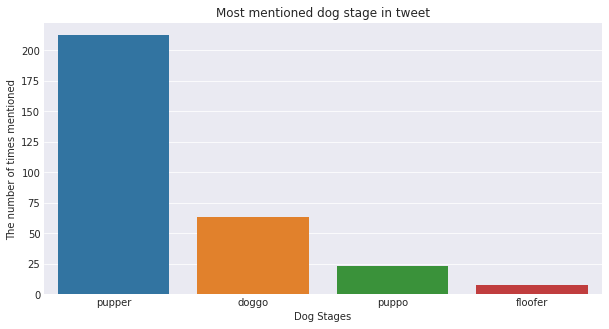

In [101]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=stage.index, y=stage.values)
plt.title('Most mentioned dog stage in tweet')
plt.ylabel('The number of times mentioned')
plt.xlabel('Dog Stages')
plt.show()

#### Result:  `pupper`  is the highest mentioned dog stage followed with `doggo`, `puppo` and `floofer` being the least

### Question #2: What is the major source of tweet?

#### Define: 
We would group our new **merge_df** by source and get the count of **tweet_id** to get this information

#### Code

In [102]:
sources = merge_df.groupby('source')['tweet_id'].count()

In [103]:
sources

source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1955
Name: tweet_id, dtype: int64

In [104]:
sources = pd.DataFrame(sources)

In [105]:
sources

,tweet_id
source,
TweetDeck,11
Twitter Web Client,28
Twitter for iPhone,1955


In [106]:
sources.index

Index(['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone'], dtype='object', name='source')

#### Answer: major source of tweet is from iphone

#### Visualisation

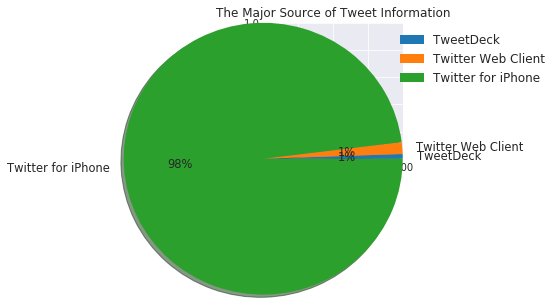

In [107]:
#figure size
plt.figure(figsize=(2.5,2.5))
#title
plt.title('The Major Source of Tweet Information')

#fontsize
textprops = {"fontsize": 11.5}

#piechart
plt.pie(sources.tweet_id, labels=sources.index, textprops = textprops, autopct = '%0.f%%', shadow = True,frame=True)

#legend
plt.legend(labels=sources.index, loc='upper center', bbox_to_anchor=(1.5,1), ncol=1, fontsize = 12)

#display
plt.show()

### Question #3: comparing retweeted counts and favourite counts

#### Define: 
1. Create a new column tweet and date by getting the date values from timestamp.
1. Assign retweet_counts, favorite_counts to a new variable
2. Get the moving average for retweet_counts and favorite_count.
3. plot the information on a line chart for visualisation

#### Code

In [108]:
# create a new column date that will contain tweets for a certain day
merge_df['date'] = merge_df['timestamp'].dt.date

#creating a tweets table
merge_df['tweets'] = 1

In [109]:
tw_df = merge_df[['date','tweets']].groupby(['date']).sum()

In [110]:
tw_df.sample(10)

,tweets
date,
2016-09-05,2
2016-04-25,1
2017-07-07,2
2017-05-18,1
2016-08-02,2
2016-12-09,1
2016-12-13,2
2015-11-19,23
2016-01-23,6


In [111]:
#moving average of tweets
tw_df['tweets'] = tw_df.rolling(window=20).mean()

In [112]:
tw_df.tweets.describe()

count    577.000000
mean       3.134575
std        3.012579
min        1.300000
25%        1.750000
50%        2.200000
75%        2.900000
max       18.750000
Name: tweets, dtype: float64

#### Visualization

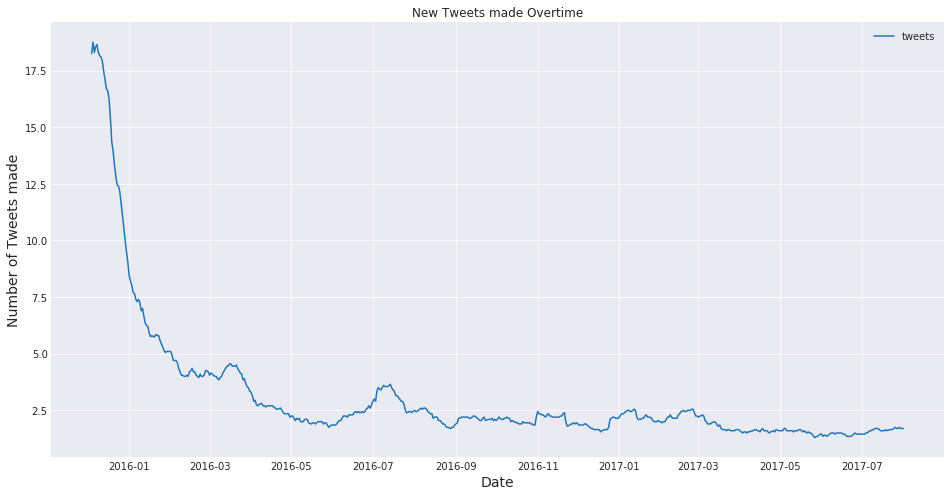

In [113]:
#figure size
#plt.figure(figsize=(20,10))

#line plot
tw_df.plot(figsize=(16,8),title='New Tweets made Overtime')

plt.ylabel('Number of Tweets made',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.show();

#### Result: 
18.75 average number of tweets were created on the begining day in year 2016 and has been decreasing since then.

### Comparing retweets and favorite tweets to original tweets

In [114]:
merge_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,created_at,display_text_range,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,tweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08-01 16:23:56,"[0, 85]",...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017-08-01 00:17:27,"[0, 138]",...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017-07-31 00:18:03,"[0, 121]",...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017-07-30 15:58:51,"[0, 79]",...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,2017-07-30,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017-07-29 16:00:24,"[0, 138]",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,1


In [115]:
#assigning date retweets and favorites counts to a new varible
new_df = merge_df[['date','retweet_count','favorite_count']]

#retweet running average
retw = new_df[['date', 'retweet_count']].groupby(['date']).sum()
retw['retweet_count'] = retw['retweet_count'].rolling(window=20).mean() 

In [116]:
#favorite running average
fav = new_df[['date', 'favorite_count']].groupby(['date']).sum()
fav['favorite_count'] = fav['favorite_count'].rolling(window=20).mean()

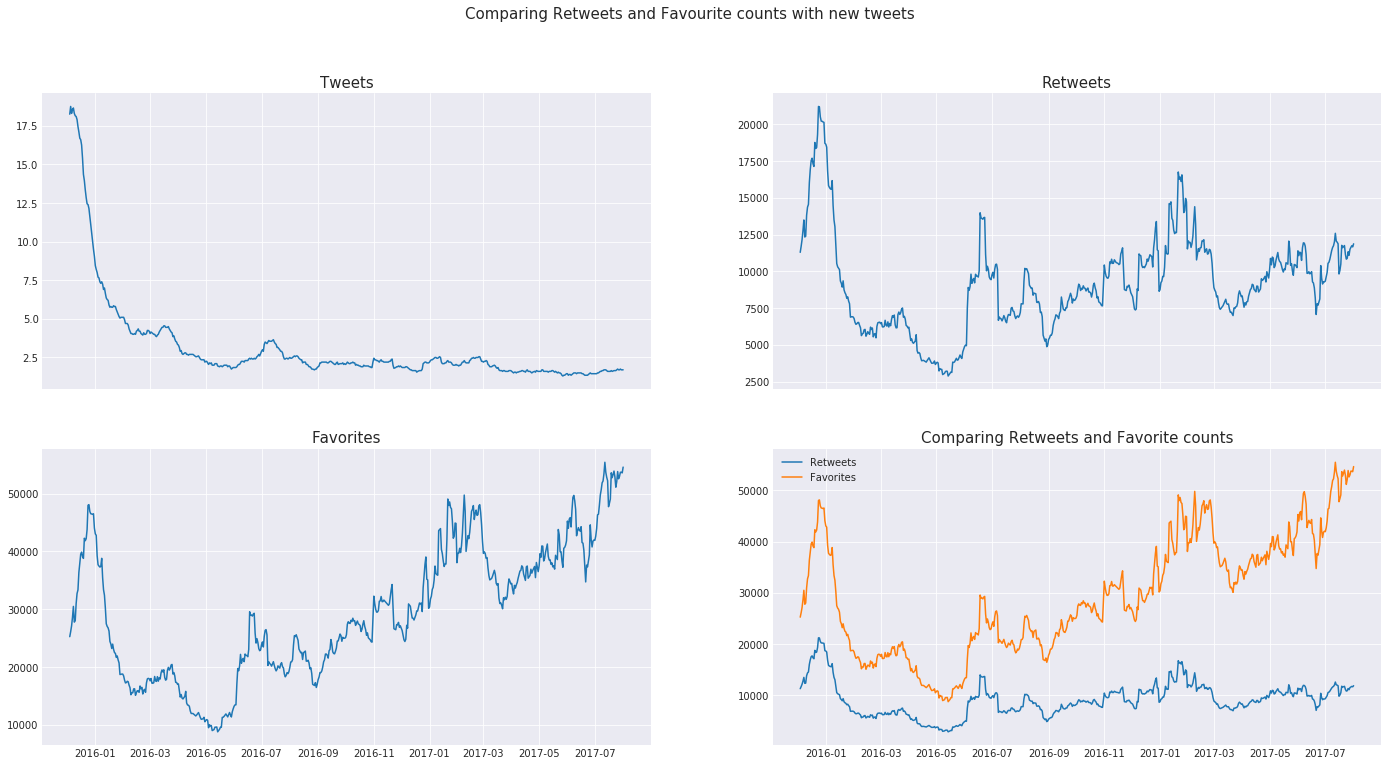

In [117]:
fig, axss = plt.subplots(2,2, sharex = True, sharey= False, squeeze=True, figsize=(24,12)) 
axss[0,0].plot(tw_df)
axss[0,0].set_title('Tweets',fontsize=15)
axss[0,1].plot(retw)
axss[0,1].set_title('Retweets',fontsize=15)
axss[1,0].plot(fav)
axss[1,0].set_title('Favorites',fontsize=15)
axss[1,1].plot(retw, label='Retweets')
axss[1,1].plot(fav, label='Favorites')
axss[1,1].set_title('Comparing Retweets and Favorite counts',fontsize=15)
axss[1,1].legend()

fig.suptitle('Comparing Retweets and Favourite counts with new tweets',fontsize=15)
plt.show()

#### Results:
The count of Retweet tends to stay on the same level, while favorite count tends to increase overtime


### Insights: <a class="anchor" id="in"></a>

1. Pupper is the highest mentioned dog stage on tweets total.

2. The major source of tweets are from iphone.

3. The count of Retweet tends to stay on the same level, while favorite count tends to increase overtime.

### References  <a class="anchor" id="rf"></a>


1. [Geeksforgeeks](https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/)

2. [Stackoverflow](https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none#:~:text=nan%20allows%20for%20vectorized%20operations,disables%20all%20efficiency%20in%20numpy.)

3. [sparkbyexamples](https://sparkbyexamples.com/pandas/pandas-merge-multiple-dataframes/)

4. https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin